<a href="https://colab.research.google.com/github/FaraazArsath/Decision-Tree/blob/main/Decision_Tree_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Classification** 

<pre>Breast Cancer
Classifcation problem whether the tumor is Benign or Malignant</pre>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (3, 3)}) 

In [109]:
df = pd.read_csv("wbc.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

**Data Cleaning**

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [111]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [112]:
# dropping 'id' column as it will be unique and should not be included in prediction & 'Unnamed: 32' has 569 'NAN' values
df = df.drop(columns=['Unnamed: 32','id'])

checking for missing values

In [113]:
df.isnull().sum().sum()

0

removing duplicate values

In [114]:
df = df.drop_duplicates()

In [115]:
df.shape

(569, 31)

Checking for outliers

In [116]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


area_mean                  25
area_se                    65
area_worst                 35
compactness_mean           16
compactness_se             28
compactness_worst          16
concave points_mean        10
concave points_se          19
concave points_worst        0
concavity_mean             18
concavity_se               22
concavity_worst            12
diagnosis                   0
fractal_dimension_mean     15
fractal_dimension_se       28
fractal_dimension_worst    24
perimeter_mean             13
perimeter_se               38
perimeter_worst            15
radius_mean                14
radius_se                  38
radius_worst               17
smoothness_mean             6
smoothness_se              30
smoothness_worst            7
symmetry_mean              15
symmetry_se                27
symmetry_worst             23
texture_mean                7
texture_se                 20
texture_worst               5
dtype: int64

In [117]:
df.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

we found there are meaningful outliers in the data so no need to drop those values.

**Encoding data**

In [118]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [119]:
#All independent features are numerical and only target feature 'diagnosis' has to be enconded 
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


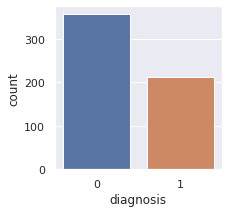

In [120]:
sns.countplot(df['diagnosis'])

From this graph we can interpret majority of 'diagnosis' category belongs to benign i,e class '0'

In [121]:
print(len(df.columns))
df.columns

31


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

We have 30 independent variable in this dataset. By looking to features suffix  name we can infer that features are categorized into 'mean','se' and 'worst' 

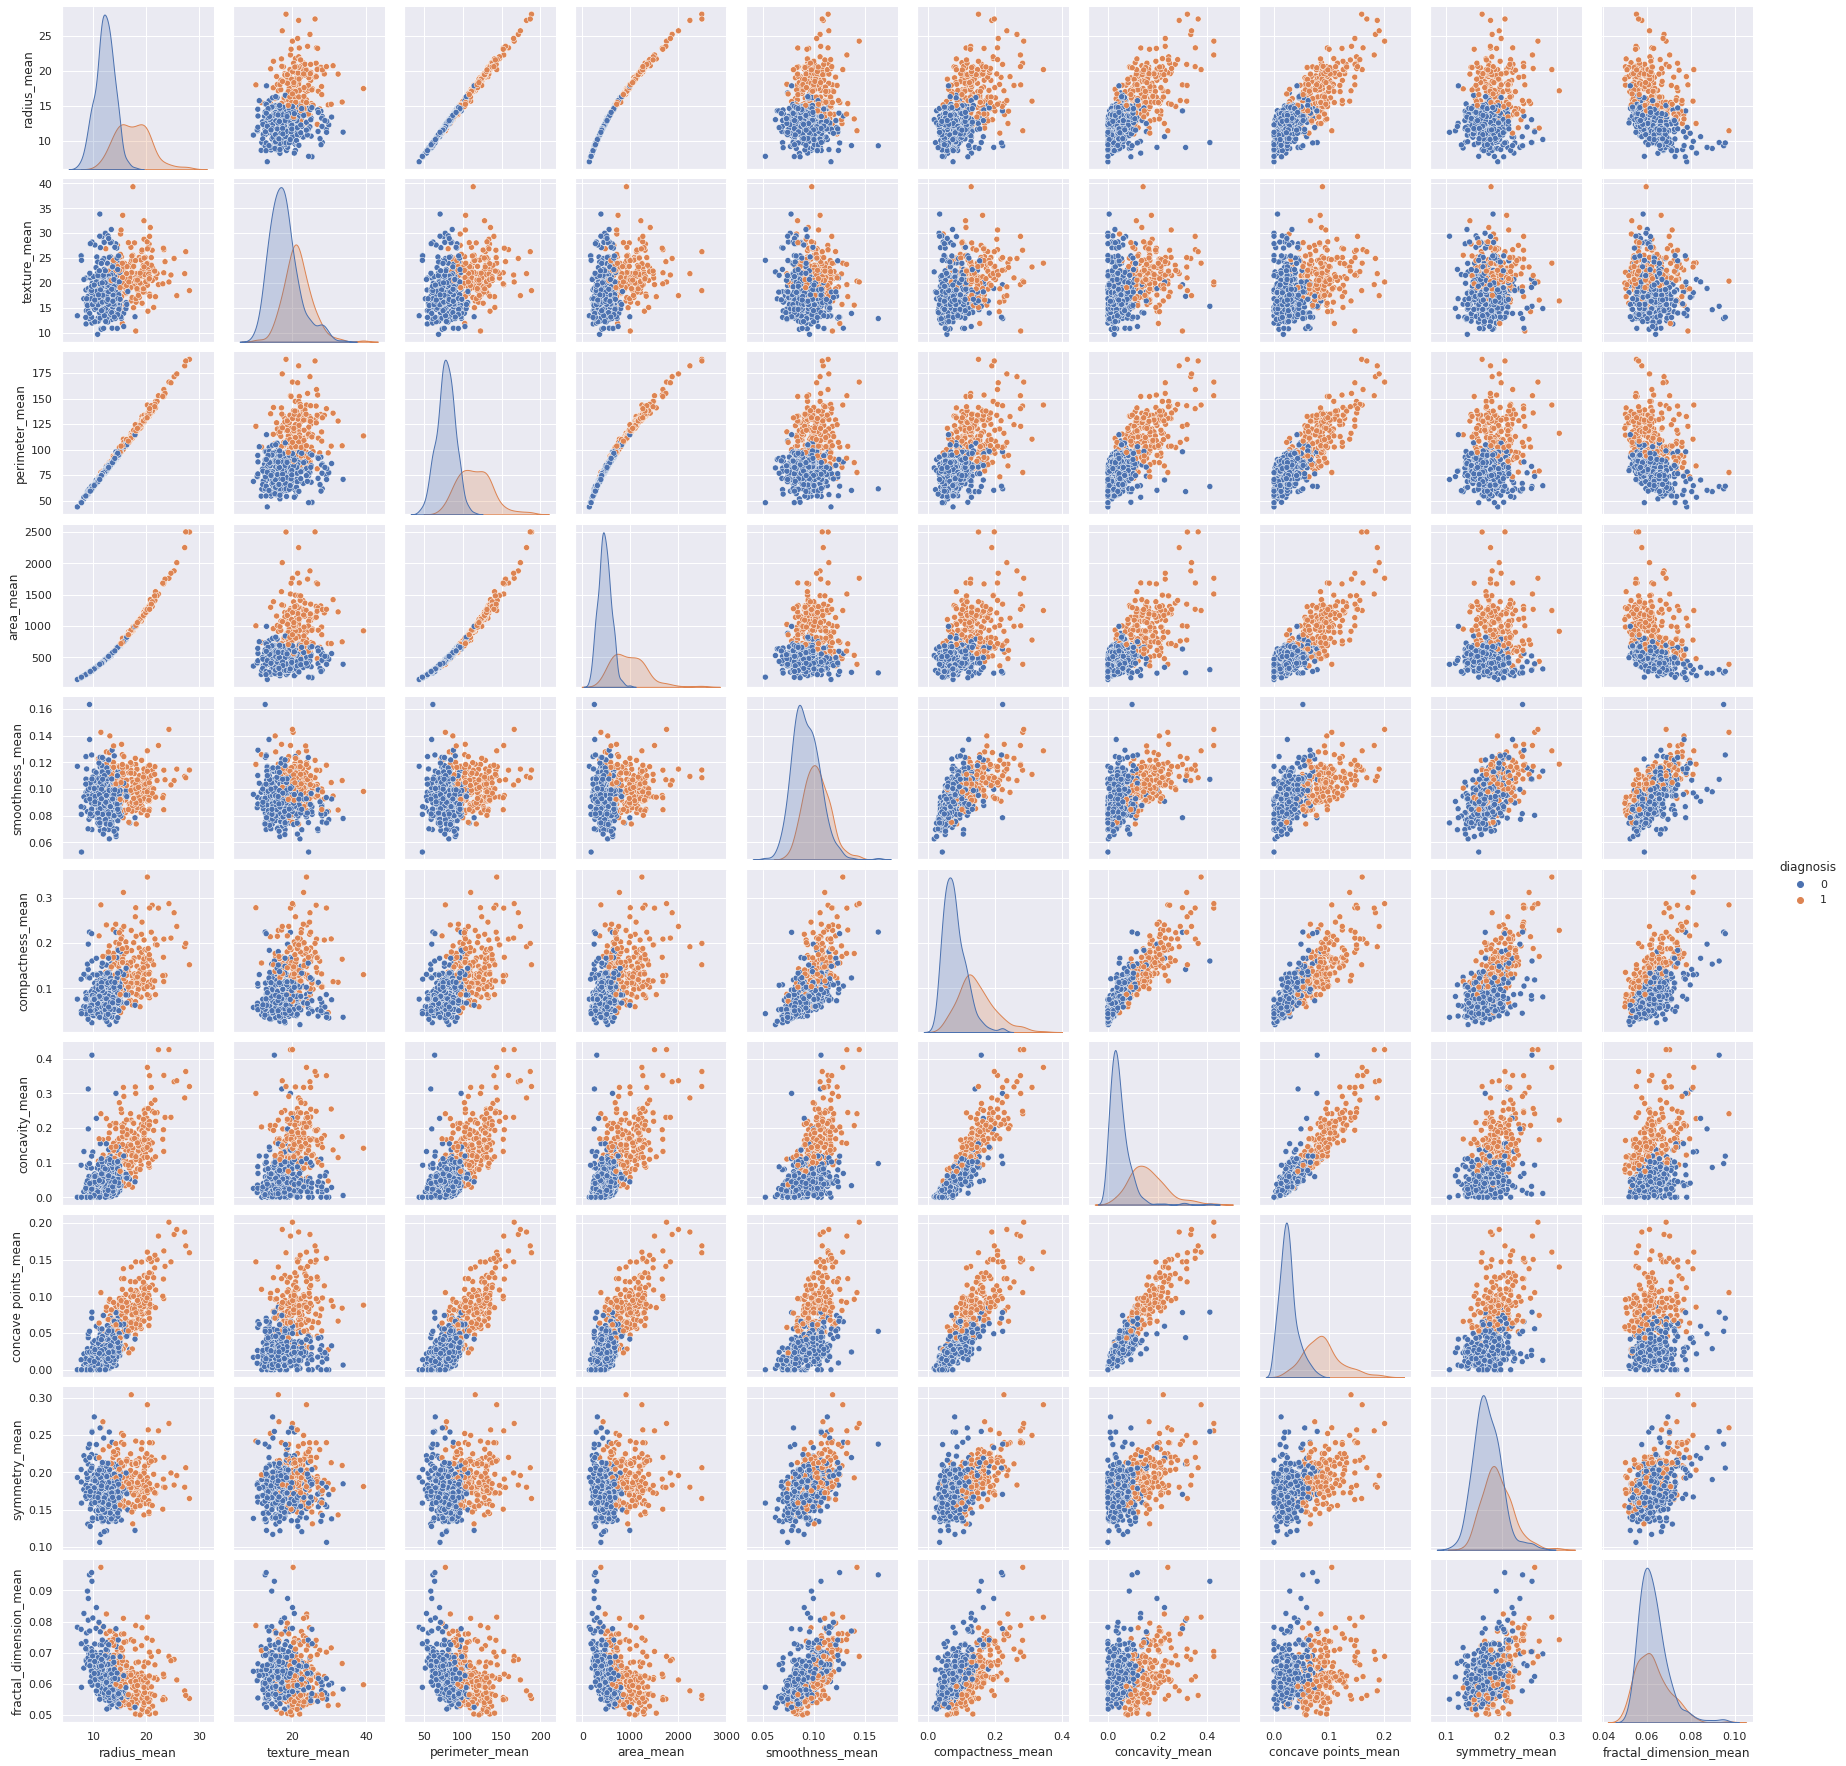

In [122]:
# Finding correlation between suffix '_mean' features

sns.pairplot(df,vars=df.columns[1:11],hue ='diagnosis')       

The above graph illustrates some 

*   positive correlation between 'radius_mean' and 'perimeter-mean'
*   positive correlation between 'radius_mean' and 'area-mean'
*   positive correlation between 'area_mean' and 'perimeter-mean'






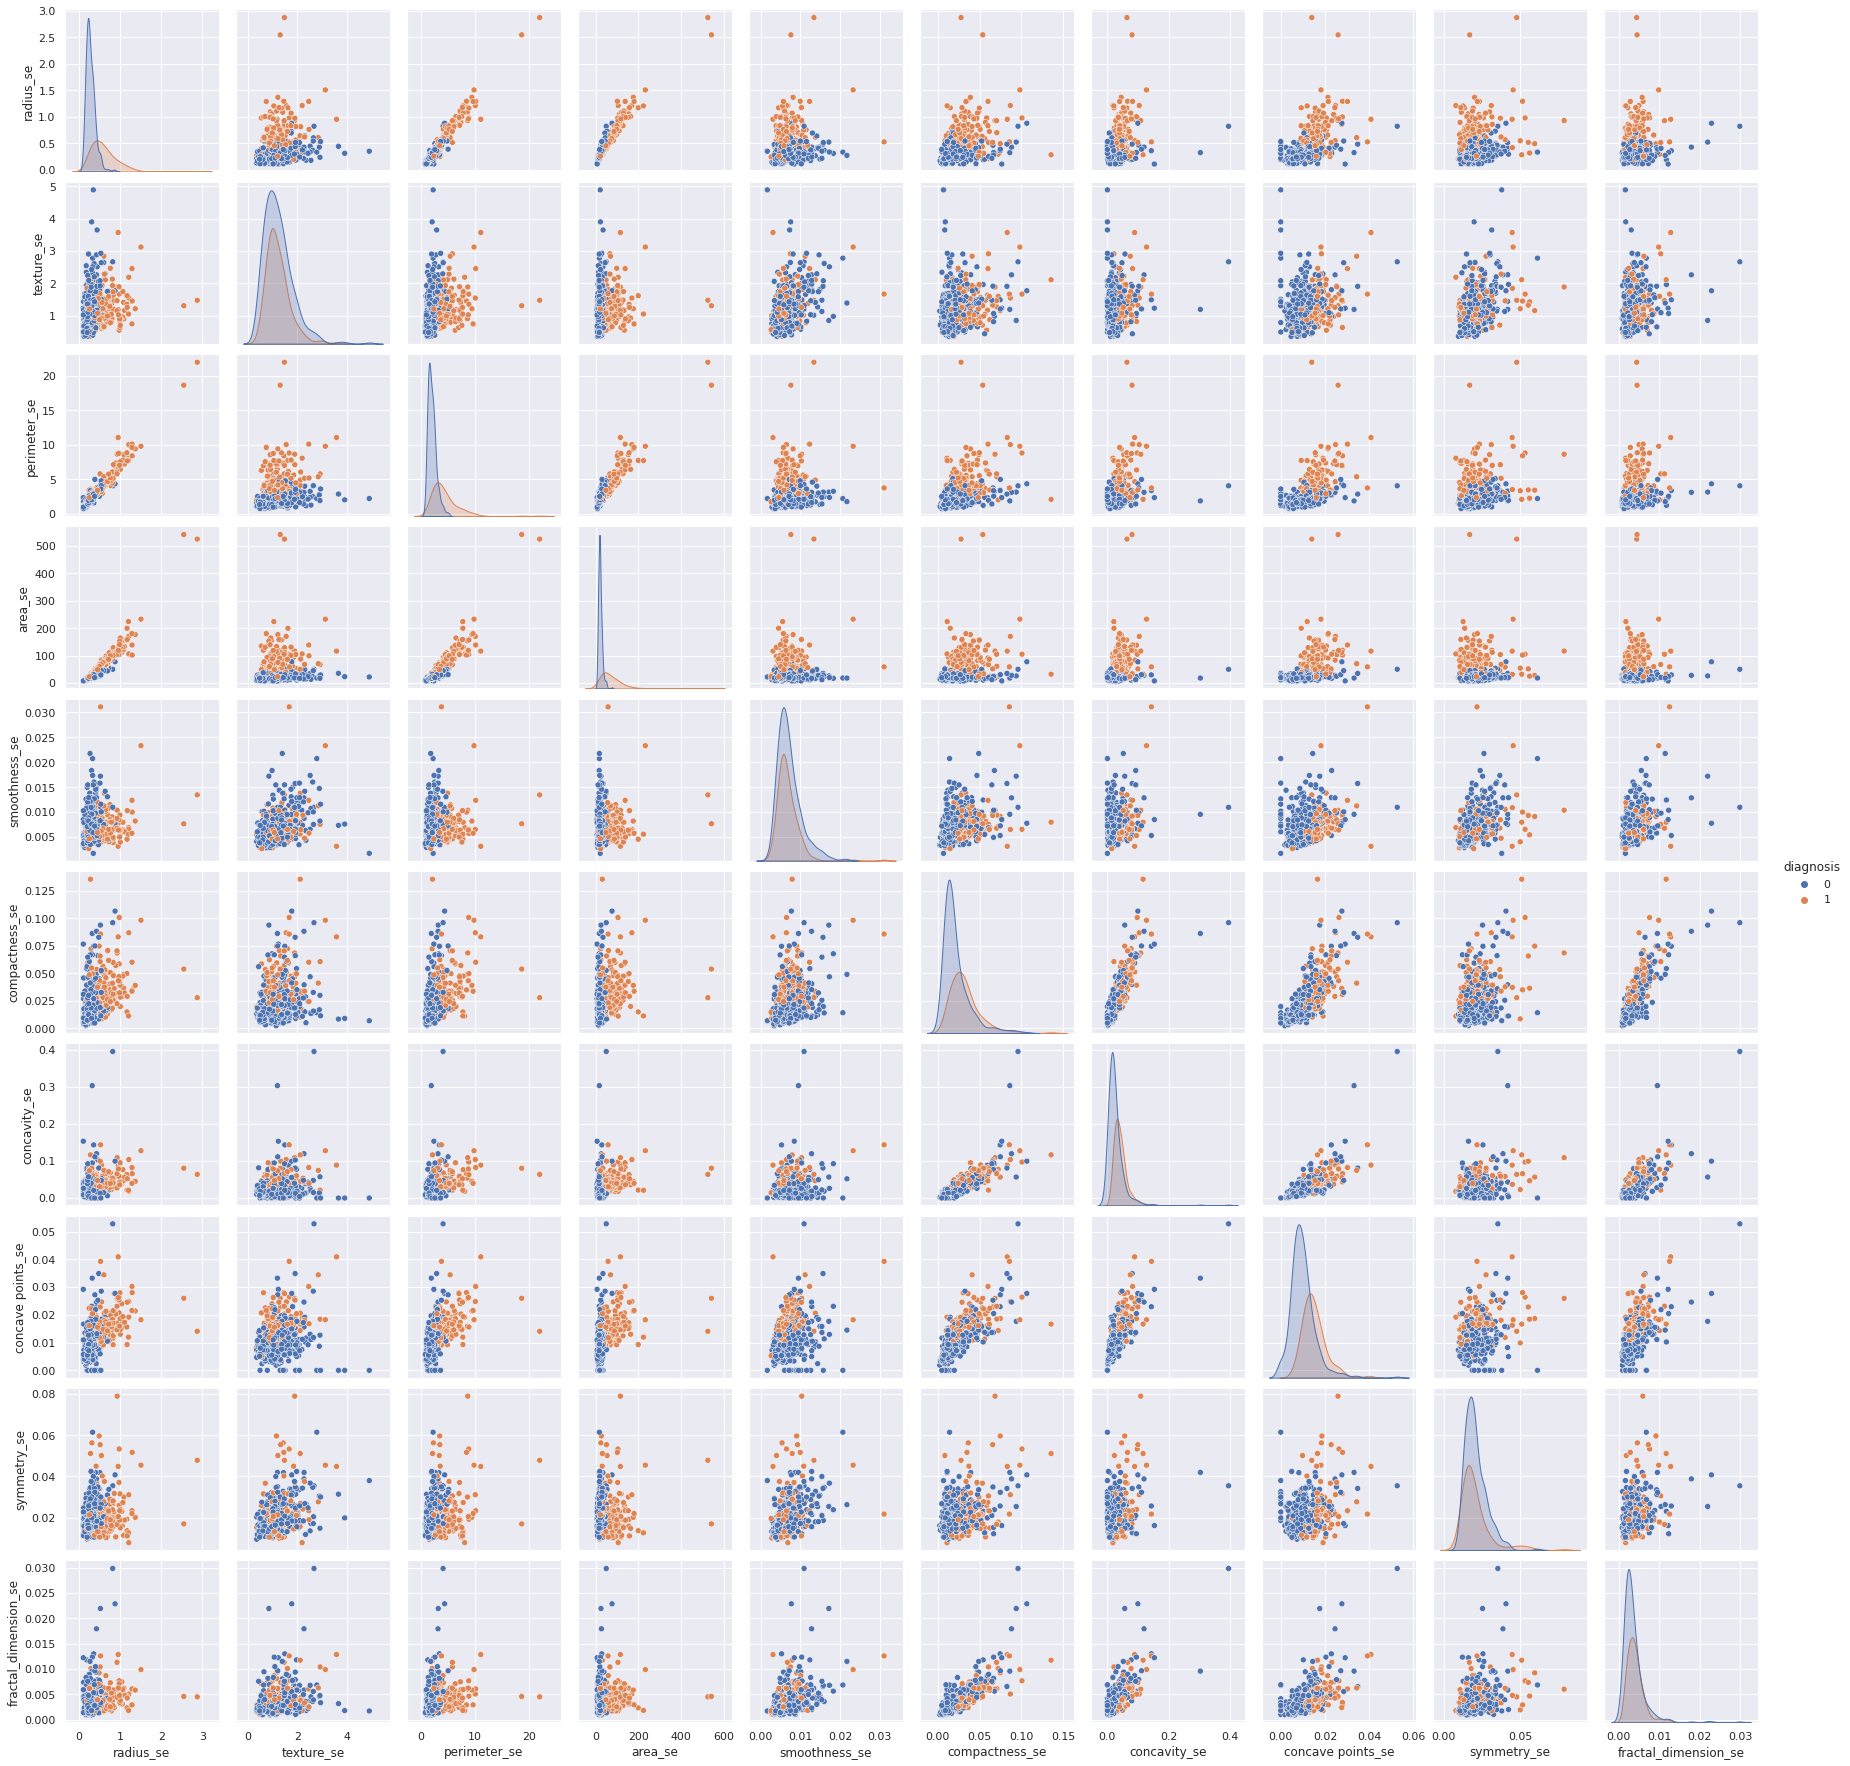

In [123]:
# Finding correlation between suffix '_se' features

sns.pairplot(df,vars=df.columns[11:21],hue ='diagnosis')  

The above graph illustrates some 

*   positive correlation between 'radius_se' and 'perimeter-se'
*   positive correlation between 'radius_se' and 'area-se'
*   positive correlation between 'area_se' and 'perimeter-se'

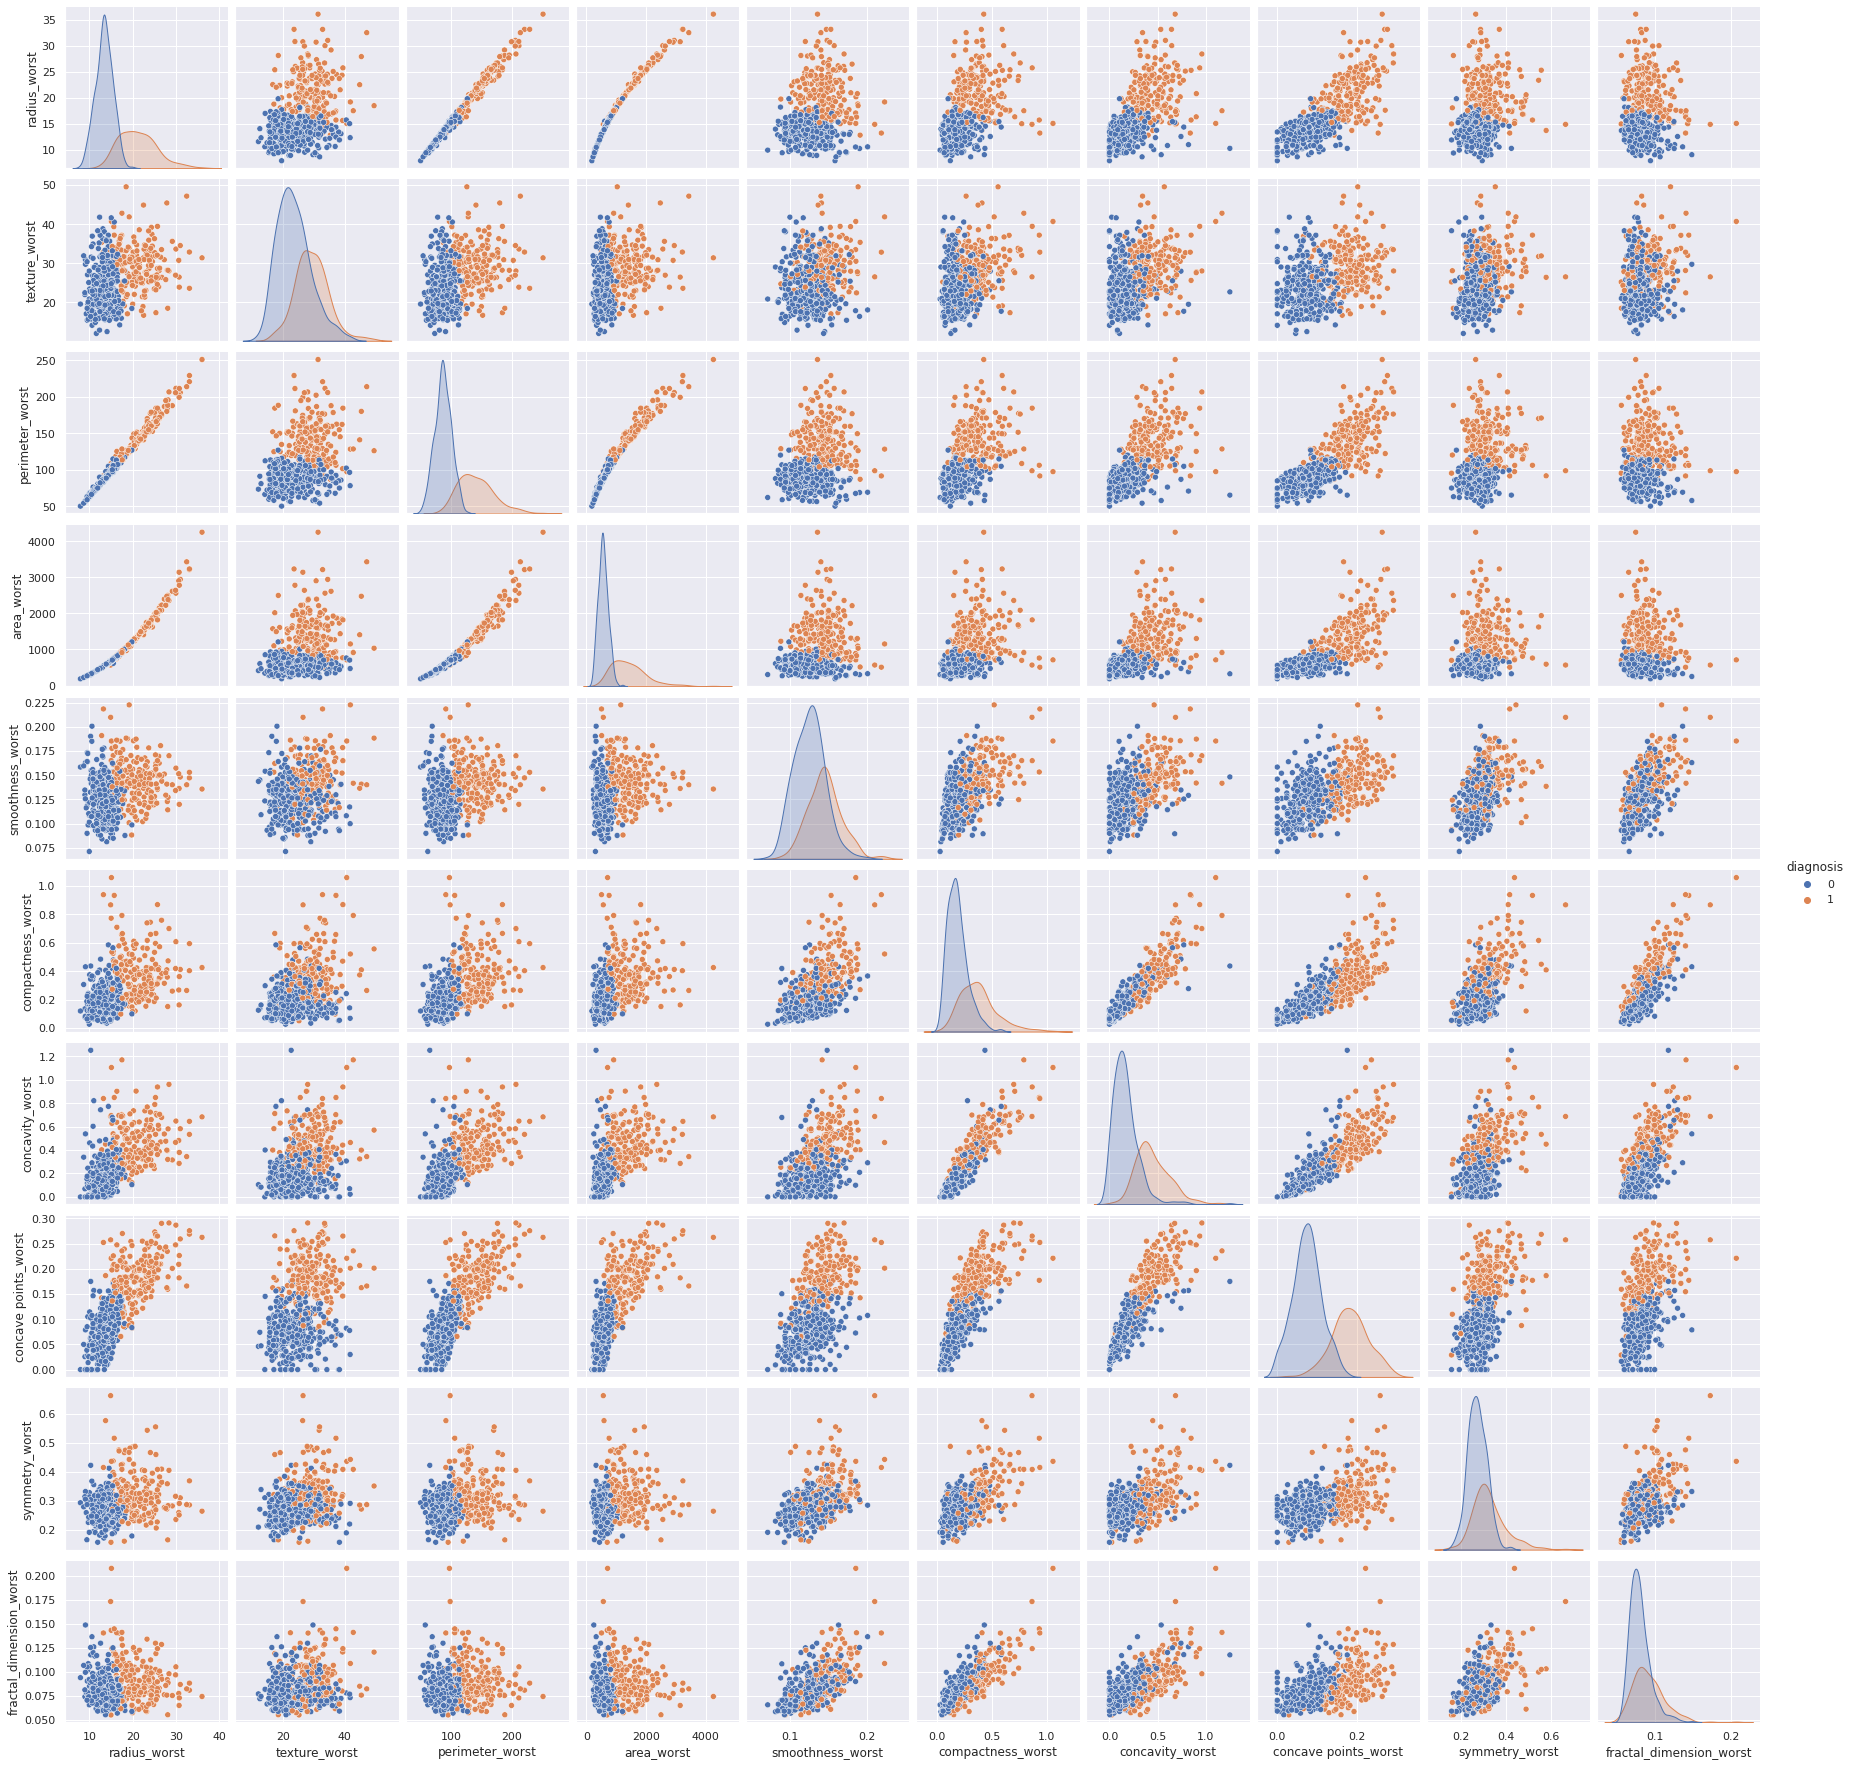

In [124]:
# Finding correlation between suffix '_worst' features

sns.pairplot(df,vars=df.columns[21:],hue ='diagnosis')  

The above graph illustrates some 

*   positive correlation between 'radius_worst' and 'perimeter-worst'
*   positive correlation between 'radius_worst' and 'area-worst'
*   positive correlation between 'area_worst' and 'perimeter-worst'

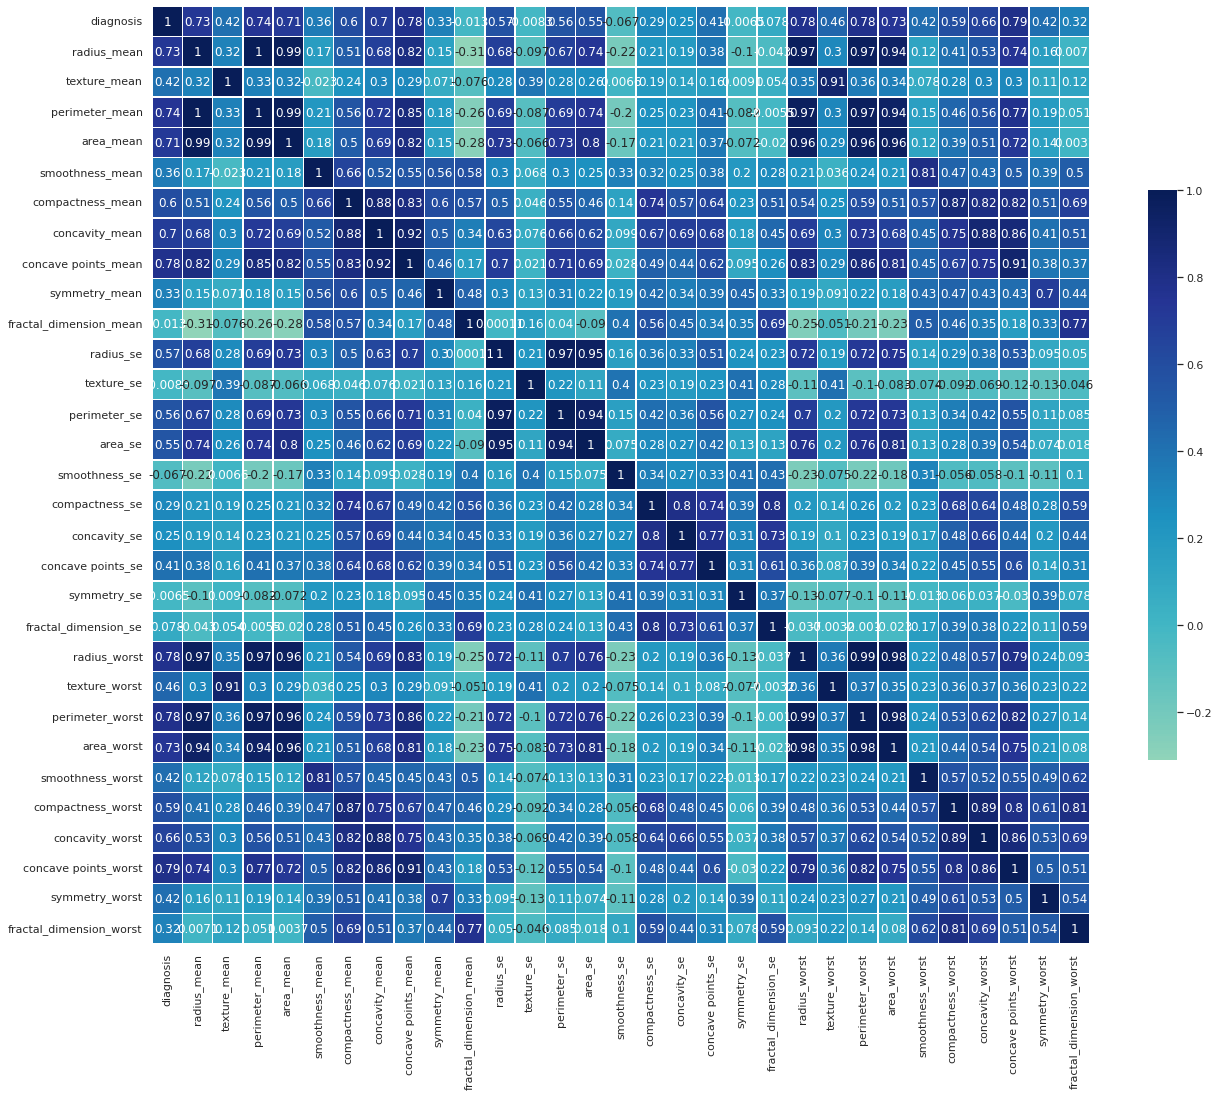

In [125]:
# Quantifying the correlation using correlation matrix

correlation = df.corr()
f, ax = plt.subplots(figsize=(21, 21))
sns.heatmap(correlation,cmap="YlGnBu",annot=True, linewidths=.5,center=0,square=True,cbar_kws={"shrink": .5})

From correlation map, we observe there is a strong positive linear relationships exists between independent variables (multicollinearity).

In [126]:
# checking for features having strong positive correlation
correlation[abs(correlation['diagnosis']) > 0.7].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

The following columns are the one's having strong positive correlations between with our diagnosis column. 

There are two things that can be done.

1. We can either use only the columns which have greatest correlation, or we can continue to use all the columns.
2. Here we will be using all these columns to predict our result and analyze the acuracy.

**Splitting the datasets into training sets and Test sets**

In [127]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=30)

In [128]:
X_train.shape,y_train.shape

((426, 30), (426,))

In [129]:
X_test.shape,y_test.shape

((143, 30), (143,))

**Fitting Decision Tree**

In [130]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
y_predict = clf.predict(X_test)
y_predict

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [133]:
print(clf.get_depth())

6


**Evaluating Decision Tree**

Test Accuracy Score : 0.92
Test AUROC Score : 0.91


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


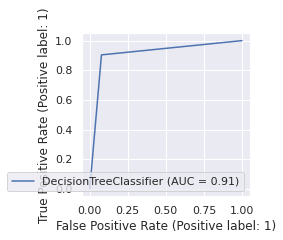

In [134]:
from sklearn.metrics import accuracy_score,roc_auc_score,plot_roc_curve

acc = accuracy_score(y_test,y_predict)
print("Test Accuracy Score : {:.2f}".format(acc))
roc = roc_auc_score(y_test,y_predict)
print("Test AUROC Score : {:.2f}".format(roc))

# Plotting area under ROC
plot_roc_curve(clf,X_test,y_test)

**Reducing Overfitting**

<pre>A model thats fits the training set well but testing set poorly is said to be overfit to the training set.
A model that fits both sets poorly is said to be underfit.</pre>

In [62]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth = i)
  dt.fit(X_train,y_train) 
  y_hat = dt.predict(X_train)
  train_accuracy = accuracy_score(y_train,y_hat)
  crossval = cross_val_score(dt,X_train,y_train,cv=10)
  print("Depth : " , i, " train score : ", train_accuracy , " Cross Validation score : ", np.mean(crossval))

Depth :  1  train score :  0.9295774647887324  Cross Validation score :  0.8918604651162789
Depth :  2  train score :  0.960093896713615  Cross Validation score :  0.931672203765227
Depth :  3  train score :  0.9788732394366197  Cross Validation score :  0.9224252491694352
Depth :  4  train score :  0.9882629107981221  Cross Validation score :  0.9270764119601329
Depth :  5  train score :  0.9929577464788732  Cross Validation score :  0.9106312292358805
Depth :  6  train score :  1.0  Cross Validation score :  0.9153931339977852
Depth :  7  train score :  1.0  Cross Validation score :  0.9153377630121817
Depth :  8  train score :  1.0  Cross Validation score :  0.9200442967884829
Depth :  9  train score :  1.0  Cross Validation score :  0.9152823920265781
Depth :  10  train score :  1.0  Cross Validation score :  0.9248615725359912
Depth :  20  train score :  1.0  Cross Validation score :  0.917607973421927


Best hyperparameter is the one which is having highest cross - validation score . Here Depth - 2 is the best hyper parameter.

**Visualizing Decision boundary**

In [63]:
# Visually comapring classification of Decision Tree and Logistic Regression

from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


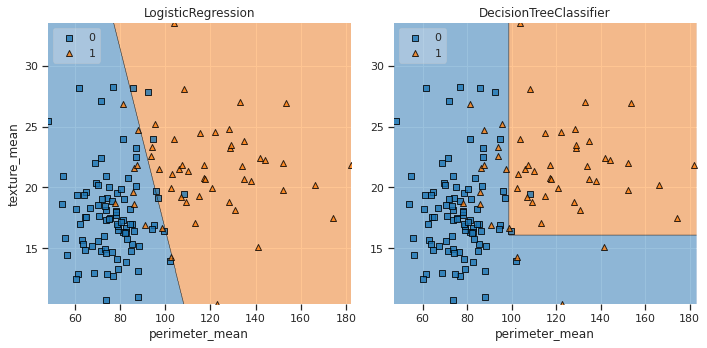

In [65]:
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=2)
X_train = X_train.loc[:,['perimeter_mean', 'texture_mean']]
X_test = X_test.loc[:,['perimeter_mean', 'texture_mean']]
dt.fit(X_train, y_train)

# Instantiate logreg
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

**Feature Importance**

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt = DecisionTreeClassifier(criterion='gini',max_depth = 2,random_state=20)
dt.fit(X_train, y_train)

# Calculating the feature importances based on Information Gain

importance = dt.feature_importances_ 
list(zip(importance,X_test.columns)) 

[(0.0, 'radius_mean'),
 (0.0, 'texture_mean'),
 (0.0, 'perimeter_mean'),
 (0.0, 'area_mean'),
 (0.0, 'smoothness_mean'),
 (0.0, 'compactness_mean'),
 (0.0, 'concavity_mean'),
 (0.08202295102797609, 'concave points_mean'),
 (0.0, 'symmetry_mean'),
 (0.0, 'fractal_dimension_mean'),
 (0.0, 'radius_se'),
 (0.0, 'texture_se'),
 (0.0, 'perimeter_se'),
 (0.0, 'area_se'),
 (0.0, 'smoothness_se'),
 (0.0, 'compactness_se'),
 (0.0, 'concavity_se'),
 (0.0, 'concave points_se'),
 (0.0, 'symmetry_se'),
 (0.0, 'fractal_dimension_se'),
 (0.0, 'radius_worst'),
 (0.0, 'texture_worst'),
 (0.8699281537716949, 'perimeter_worst'),
 (0.0, 'area_worst'),
 (0.0, 'smoothness_worst'),
 (0.0, 'compactness_worst'),
 (0.0, 'concavity_worst'),
 (0.04804889520032898, 'concave points_worst'),
 (0.0, 'symmetry_worst'),
 (0.0, 'fractal_dimension_worst')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


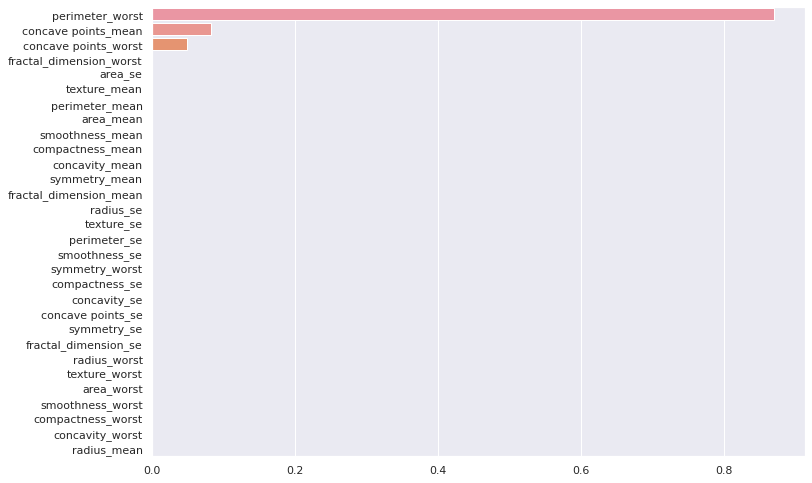

In [93]:
import seaborn as sns

feature_importances = dt.feature_importances_

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances, sorted_feature_names)
plt.show()

Based on this output, we could conclude that the features **perimeter worst**  , **concave points mean** and **concave points worst** are most predictive of a malignant tumor. 

**Visualizing tree**

[Text(0.5, 0.8333333333333334, 'X[22] <= 105.95\ngini = 0.463\nsamples = 455\nvalue = [289, 166]'),
 Text(0.25, 0.5, 'X[27] <= 0.159\ngini = 0.089\nsamples = 280\nvalue = [267, 13]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.05\nsamples = 272\nvalue = [265, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.5, 'X[7] <= 0.049\ngini = 0.22\nsamples = 175\nvalue = [22, 153]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.483\nsamples = 27\nvalue = [16, 11]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.078\nsamples = 148\nvalue = [6, 142]')]

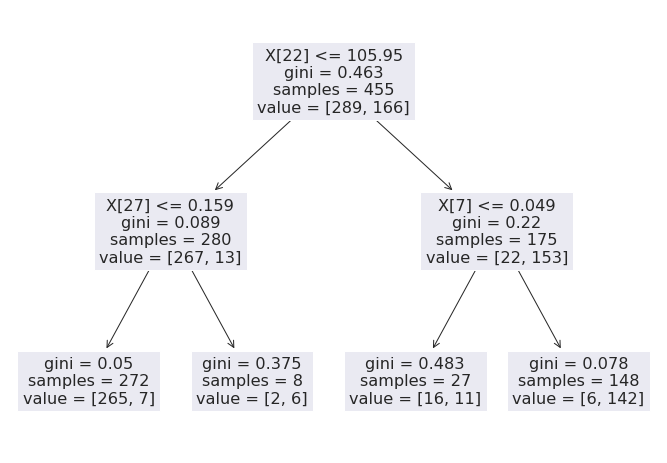

In [94]:
from sklearn import tree
tree.plot_tree(dt)

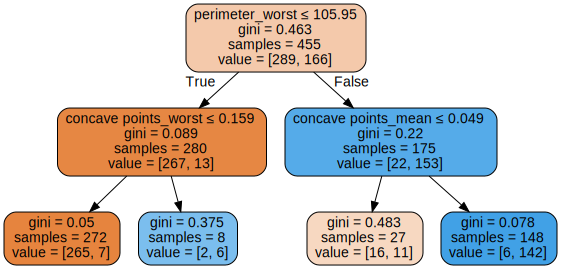

In [103]:
# Visualizing using Graphviz 
import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True,special_characters=True,feature_names=X.columns) 
graph = graphviz.Source(dot_data) 
graph